In [1]:
### Reloads modules properly
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.sys.path.append('../')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
!ls -lh /media/lucas/My\ Passport/

total 192M
drwxr-xr-x  5 lucas lucas 256K May 28  2021  archive
drwxr-xr-x 25 lucas lucas 256K May 23  2021  ArchiveGlacier
drwxr-xr-x 11 lucas lucas 256K Mar 21 16:35  cccad4
drwxr-xr-x  5 lucas lucas 256K May  7  2020  dataframesH5
drwxr-xr-x  3 lucas lucas 256K Jan 25  2021  docker-backup
drwxr-xr-x  8 lucas lucas 256K Apr 21 18:37  docs
drwxr-xr-x 11 lucas lucas 256K Jun 14  2021  HTT
drwxr-xr-x  2 lucas lucas 256K Aug  6  2020  ISO
drwxr-xr-x  6 lucas lucas 256K Aug 14  2020  latitude7490C7backup
-rwxr-xr-x  1 lucas lucas 187M Mar 18  2020  lborgna@pc215.hep.ucl.ac.uk
drwxr-xr-x 13 lucas lucas 256K Feb  6  2021  MNT
drwxr-xr-x 43 lucas lucas 256K Sep 16  2021  NNT
drwxr-xr-x 20 lucas lucas 256K Apr 26 17:22  PhD-laptop-Backup
drwxr-xr-x  4 lucas lucas 256K Apr 26 17:13  Pictures
drwxr-xr-x  3 lucas lucas 256K Aug  6  2020  SpringerBooks
drwxr-xr-x  4 lucas lucas 256K Jul 23  2020  storage
drwxr-xr-x  4 lucas lucas 256K Jun  4  2020  sys-studies-2
drwxr-xr-x  2 lucas lucas 256K Dec

In [5]:
trk = pd.read_pickle('/home/lucas/data/trk_25k.pkl')

In [45]:
trk.shape

(4562541, 7)

In [46]:
trk.dropna(inplace=True)

In [47]:
trk.shape

(4562536, 7)

In [48]:
trk['is_pv'] = 0

In [49]:
mask = trk['trk_fake']==1

In [50]:
trk.loc[mask, 'is_pv'] = 1

In [51]:
e0 = trk.query('entry == 0').copy()

In [52]:
from sklearn.decomposition import PCA

In [53]:
e0.head()

trk_pt   trk_eta   trk_phi  trk_d0    trk_z0  trk_fake  \
entry subentry                                                             
0     0         2.623967  1.301414 -0.289234   999.0 -0.878906         2   
      1         3.435026  0.566814 -0.159267   999.0  3.339844         2   
      2         3.774908  1.815973 -0.240375   999.0  4.921875         1   
      3         2.641448 -1.435747 -0.128747   999.0 -0.468750         2   
      4         2.320653  1.837421  0.032604   999.0  4.980469         1   

                is_pv  
entry subentry         
0     0             0  
      1             0  
      2             1  
      3             0  
      4             1

In [54]:
X = e0[['trk_pt','trk_eta','trk_phi','trk_z0']].values

In [55]:
pca = PCA(n_components=2)

In [56]:
pca.fit(X)

PCA(n_components=2)

In [57]:
print(pca.explained_variance_ratio_)

[0.64784396 0.1454969 ]


In [58]:
print(pca.singular_values_)

[47.62633  22.570375]


In [59]:
y = pca.transform(X)

In [60]:
y.shape

(159, 2)

In [61]:
e0['pca1'] = y[:,0]

In [62]:
e0['pca2'] = y[:,1]

In [63]:
import seaborn as sns

<AxesSubplot:xlabel='pca1', ylabel='pca2'>

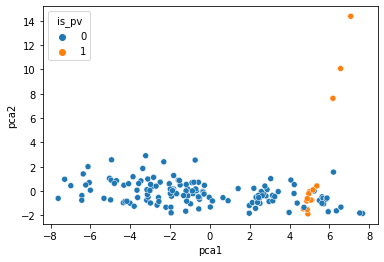

In [64]:
sns.scatterplot(data=e0, x='pca1',y='pca2',hue='is_pv')

In [65]:
X_a = trk[['trk_pt','trk_eta','trk_phi','trk_z0']].values

In [66]:
pca_a = PCA(n_components=2)

In [67]:
pca_a.fit(X_a)

PCA(n_components=2)

In [68]:
y_a = pca_a.transform(X_a)

In [69]:
trk['pca_a1'] = y_a[:,0]
trk['pca_a2'] = y_a[:,1]

<AxesSubplot:xlabel='pca_a1', ylabel='pca_a2'>

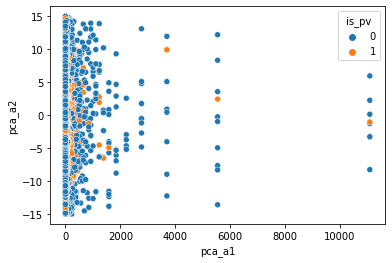

In [71]:
sns.scatterplot(data=trk, x='pca_a1',y='pca_a2',hue='is_pv')

In [72]:
from sklearn.manifold import TSNE

In [ ]:
y_t = TSNE(n_components=2).fit_transform(X_a)


/home/lucas/anaconda3/envs/db-clustering/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/lucas/anaconda3/envs/db-clustering/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [74]:
y_t

array([[ 8.77663206e-06,  1.43493990e-05],
       [-1.89734817e-06, -6.85519217e-06],
       [ 5.06571587e-06, -1.40993225e-05],
       ...,
       [ 9.65761774e-06,  6.31146349e-06],
       [-1.50713031e-05, -2.53943799e-05],
       [-5.66459789e-07, -7.31271530e-06]], dtype=float32)

In [76]:
y_t.shape

(4562536, 2)

In [77]:
trk['tsne_a1'] = y_t[:,0]
trk['tsne_a2'] = y_t[:,1]

<AxesSubplot:xlabel='tsne_a1', ylabel='tsne_a2'>

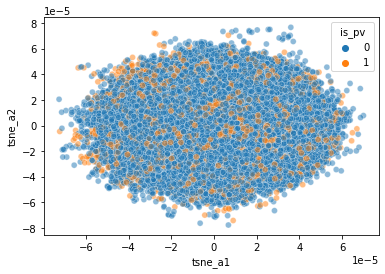

In [79]:
sns.scatterplot(data=trk, x='tsne_a1',y='tsne_a2',hue='is_pv', alpha=0.5)

##### 